## Project: Predict Bike Sharing Demand with AutoGluon

https://www.kaggle.com/c/bike-sharing-demand/overview

Bike sharing systems are a means of renting bicycles where the process of obtaining membership, rental, and bike return is automated via a network of kiosk locations throughout a city. Using these systems, people are able rent a bike from a one location and return it to a different place on an as-needed basis. Currently, there are over 500 bike-sharing programs around the world.

The data generated by these systems makes them attractive for researchers because the duration of travel, departure location, arrival location, and time elapsed is explicitly recorded. Bike sharing systems therefore function as a sensor network, which can be used for studying mobility in a city. In this competition, participants are asked to combine historical usage patterns with weather data in order to forecast bike rental demand in the Capital Bikeshare program in Washington, D.C.



1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [1]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir

  Using cached setuptools-80.9.0-py3-none-any.whl.metadata (6.6 kB)
Using cached setuptools-80.9.0-py3-none-any.whl (1.2 MB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 80.1.0
    Uninstalling setuptools-80.1.0:
      Successfully uninstalled setuptools-80.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dash 2.18.1 requires dash-core-components==2.0.0, which is not installed.
dash 2.18.1 requires dash-html-components==2.0.0, which is not installed.
dash 2.18.1 requires dash-table==5.0.0, which is not installed.
dash 2.18.1 requires Flask<3.1,>=1.0.4, but you have flask 3.1.0 which is incompatible.
dash 2.18.1 requires Werkzeug<3.1, but you have werkzeug 3.1.3 which is incompatible.
spacy 3.8.5 requires thinc<8.4.0,>=8.3.4, but you have thinc 8.3.2 which is incompatible.
sparkmagic 0.21.0 requires pandas<2.0.0,>=0.17.1, but

### Setup Kaggle API Key

In [2]:
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root’: Permission denied
touch: cannot touch '/root/.kaggle/kaggle.json': Permission denied
chmod: cannot access '/root/.kaggle/kaggle.json': Permission denied


In [ ]:
import os
from pathlib import Path

os.makedirs('.kaggle', exist_ok=True)

with open('.kaggle/kaggle.json', 'w') as f:
    f.write('{"username":"reydal","key":""}')

os.chmod('.kaggle/kaggle.json', 0o600)

In [ ]:
with open('.kaggle/kaggle.json', 'r') as f:
    print(f.read())

### Download and explore dataset

### Go to the [bike sharing demand competition](https://www.kaggle.com/c/bike-sharing-demand) and agree to the terms

In [12]:
!pip install kaggle

In [13]:
!kaggle competitions download -c bike-sharing-demand
!unzip -o bike-sharing-demand.zip

bike-sharing-demand.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [1]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [2]:
train = pd.read_csv('train.csv', parse_dates=['datetime'])
train.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


In [3]:
print(train.describe())

                            datetime        season       holiday  \
count                          10886  10886.000000  10886.000000   
mean   2011-12-27 05:56:22.399411968      2.506614      0.028569   
min              2011-01-01 00:00:00      1.000000      0.000000   
25%              2011-07-02 07:15:00      2.000000      0.000000   
50%              2012-01-01 20:30:00      3.000000      0.000000   
75%              2012-07-01 12:45:00      4.000000      0.000000   
max              2012-12-19 23:00:00      4.000000      1.000000   
std                              NaN      1.116174      0.166599   

         workingday       weather         temp         atemp      humidity  \
count  10886.000000  10886.000000  10886.00000  10886.000000  10886.000000   
mean       0.680875      1.418427     20.23086     23.655084     61.886460   
min        0.000000      1.000000      0.82000      0.760000      0.000000   
25%        0.000000      1.000000     13.94000     16.665000     47.000000 

In [4]:
print("\ndataset shape:", train.shape)
print("\nfeature data types:")
print(train.dtypes)



dataset shape: (10886, 12)

feature data types:
datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object


In [ ]:
print("\nmissing values:")
print(train.isnull().sum())


missing values:
datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64


In [ ]:
print("\nseason distribution:")
print(train['season'].value_counts())
print("\nweather distribution:")
print(train['weather'].value_counts())



season distribution:
season
4    2734
2    2733
3    2733
1    2686
Name: count, dtype: int64

weather distribution:
weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64


In [ ]:
print("\nTarget Variable (count) Statistics:")
print(f"Mean count: {train['count'].mean():.2f}")
print(f"Median count: {train['count'].median():.2f}")
print(f"Min count: {train['count'].min()}")
print(f"Max count: {train['count'].max()}")


Target Variable (count) Statistics:
Mean count: 191.57
Median count: 145.00
Min count: 1
Max count: 977


In [8]:
test = pd.read_csv('test.csv', parse_dates=['datetime'])
train.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


In [ ]:
submission = pd.read_csv('sampleSubmission.csv', parse_dates=['datetime'])
submission.head(10)

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0
5,2011-01-20 05:00:00,0
6,2011-01-20 06:00:00,0
7,2011-01-20 07:00:00,0
8,2011-01-20 08:00:00,0
9,2011-01-20 09:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are predicting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [ ]:
predictor = TabularPredictor(label="count",
                             eval_metric="root_mean_squared_error",
                             learner_kwargs={"ignored_columns": ["casual", "registered"]}
                            ).fit(train_data=train,
                                  time_limit=600,
                                  presets="best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20250608_224952"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.0
Python Version:     3.12.9
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Tue May 6 04:10:50 UTC 2025
CPU Count:          2
Memory Avail:       2.16 GB / 3.76 GB (57.5%)
Disk Space Avail:   2.54 GB / 4.99 GB (51.0%)
	We recommend a minimum available disk space of 10 GB, and large datasets may require more.
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to ident

(_ray_fit pid=2482) [1000]	valid_set's rmse: 129.692
(_ray_fit pid=2582) [1000]	valid_set's rmse: 132.725 [repeated 5x across cluster] (Ray deduplicates logs by default. Set RAY_DEDUP_LOGS=0 to disable log deduplication, or see https://docs.ray.io/en/master/ray-observability/user-guides/configure-logging.html#log-deduplication for more options.)
(_ray_fit pid=2614) [2000]	valid_set's rmse: 126.702 [repeated 2x across cluster]
(_ray_fit pid=2648) [3000]	valid_set's rmse: 133.639 [repeated 7x across cluster]
(_ray_fit pid=2648) [7000]	valid_set's rmse: 132.416 [repeated 7x across cluster]
(_ray_fit pid=2688) [1000]	valid_set's rmse: 137.712 [repeated 3x across cluster]
(_ray_fit pid=2720) [2000]	valid_set's rmse: 138.865 [repeated 6x across cluster]


(_dystack pid=2343) 	-131.9758	 = Validation score   (-root_mean_squared_error)
(_dystack pid=2343) 	55.09s	 = Training   runtime
(_dystack pid=2343) 	11.13s	 = Validation runtime
(_dystack pid=2343) Fitting model: LightGBM_BAG_L1 ... Training model for up to 34.32s of the 82.75s of remaining time.
(_dystack pid=2343) 	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.94%)


(_ray_fit pid=2769) [1000]	valid_set's rmse: 129.274 [repeated 7x across cluster]
(_ray_fit pid=2836) [1000]	valid_set's rmse: 135.098 [repeated 2x across cluster]
(_ray_fit pid=2901) [1000]	valid_set's rmse: 124.896
(_ray_fit pid=2904) [1000]	valid_set's rmse: 134.058
(_ray_fit pid=2971) [1000]	valid_set's rmse: 134.479
(_ray_fit pid=3006) [1000]	valid_set's rmse: 136.511


(_dystack pid=2343) 	-131.8496	 = Validation score   (-root_mean_squared_error)
(_dystack pid=2343) 	26.56s	 = Training   runtime
(_dystack pid=2343) 	1.3s	 = Validation runtime
(_dystack pid=2343) Fitting model: RandomForestMSE_BAG_L1 ... Training model for up to 3.72s of the 52.15s of remaining time.
(_dystack pid=2343) /opt/conda/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
(_dystack pid=2343)   warnings.warn(
(_dystack pid=2343) 	-119.5485	 = Validation score   (-root_mean_squared_error)
(_dystack pid=2343) 	13.02s	 = Training   runtime
(_dystack pid=2343) 	0.65s	 = Validation runtime
(_dystack pid=2343) Fitting model: WeightedEnsemble_L2 ... Training model for up to 145.31s of the 37.97s of remaining time.
(_dystack pid=2343) 	Ensemble Weights: {'KNeighbo

(_ray_fit pid=3066) [1000]	valid_set's rmse: 69.5159
(_ray_fit pid=3067) [1000]	valid_set's rmse: 71.3133
(_ray_fit pid=3152) [1000]	valid_set's rmse: 78.3544
(_ray_fit pid=3153) [1000]	valid_set's rmse: 73.3059
(_ray_fit pid=3153) [2000]	valid_set's rmse: 73.2329
(_ray_fit pid=3217) [1000]	valid_set's rmse: 75.7703
(_ray_fit pid=3250) [1000]	valid_set's rmse: 76.8744
(_ray_fit pid=3285) [1000]	valid_set's rmse: 71.8442
(_ray_fit pid=3316) [1000]	valid_set's rmse: 74.306
(_ray_fit pid=3316) [2000]	valid_set's rmse: 73.5731


(_dystack pid=2343) 	-73.7411	 = Validation score   (-root_mean_squared_error)
(_dystack pid=2343) 	33.1s	 = Training   runtime
(_dystack pid=2343) 	1.78s	 = Validation runtime
(_dystack pid=2343) Fitting model: LightGBM_BAG_L2 ... Training model for up to 1.70s of the 1.68s of remaining time.
(_dystack pid=2343) 	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.99%)
(_ray_fit pid=3355) 	Ran out of time, early stopping on iteration 55. Best iteration is:
(_ray_fit pid=3355) 	[55]	valid_set's rmse: 65.9509
(_ray_fit pid=3419) 	Ran out of time, early stopping on iteration 52. Best iteration is: [repeated 2x across cluster]
(_ray_fit pid=3419) 	[52]	valid_set's rmse: 73.8039 [repeated 2x across cluster]
(_ray_fit pid=3488) 	Ran out of time, early stopping on iteration 67. Best iteration is: [repeated 2x across cluster]
(_ray_fit pid=3488) 	[67]	valid_set's rmse: 71.7195 [repeated 2x across cluster]
(_ray_fit pid

### Review AutoGluon's training run with ranking of models that did the best.

In [24]:
print("Model Training Summary:")
predictor.fit_summary()

Model Training Summary:
*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -53.102056  root_mean_squared_error      17.483943  395.503615                0.000856           0.032346            3       True         13
1   RandomForestMSE_BAG_L2  -53.422319  root_mean_squared_error      13.120109  321.332337                0.677950          40.660553            2       True         12
2          LightGBM_BAG_L2  -55.019524  root_mean_squared_error      12.739586  304.719279                0.297426          24.047495            2       True         11
3        LightGBMXT_BAG_L2  -60.478783  root_mean_squared_error      16.507710  330.763221                4.065551          50.091437            2       True         10
4    KNeighborsDist_BAG_L1  -84.125061  root_mean_squared_error      

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -131.46090891834504,
  'LightGBM_BAG_L1': -131.054161598899,
  'RandomForestMSE_BAG_L1': -116.54835939455667,
  'CatBoost_BAG_L1': -130.6969870627499,

### Create predictions from test dataset

In [27]:
predictions = predictor.predict(test)
predictions.head()

0    22.380445
1    42.286713
2    45.498768
3    48.563759
4    51.600803
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [28]:
# Describe predictions
print("\nPredictions description:")
print(predictions.describe())

# Count negative values
negative_count = (predictions < 0).sum()
print(f"\nNumber of negative predictions: {negative_count}")


Predictions description:
count    6493.000000
mean      100.501862
std        89.704025
min         2.762549
25%        19.880796
50%        63.815502
75%       167.220551
max       367.409241
Name: count, dtype: float64

Number of negative predictions: 0


In [30]:
# Replace negative values with 0
predictions = predictions.clip(lower=0)

### Set predictions to submission dataframe, save, and submit

In [32]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [33]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "bike-sharing-demand"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 747kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6
# errors was because of the wrong parsing, now it is fixed

fileName                     date                        description                        status                     publicScore  privateScore  
---------------------------  --------------------------  ---------------------------------  -------------------------  -----------  ------------  
submission.csv               2025-06-08 23:09:48.613000  bike-sharing-demand                SubmissionStatus.COMPLETE  1.80094      1.80094       
submission_new_hpo.csv       2025-06-07 23:27:08.937000  new features with hyperparameters  SubmissionStatus.ERROR                                
submission_new_features.csv  2025-06-07 18:58:58.727000  new features                       SubmissionStatus.ERROR                                
submission.csv               2025-06-07 18:41:59.867000  bike-sharing-demand                SubmissionStatus.ERROR                                


#### Initial score of `1.80094 `

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

In [35]:
import matplotlib.pyplot as plt

## Exploritory data analysis

array([[<Axes: title={'center': 'datetime'}>,
        <Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'holiday'}>],
       [<Axes: title={'center': 'workingday'}>,
        <Axes: title={'center': 'weather'}>,
        <Axes: title={'center': 'temp'}>],
       [<Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>],
       [<Axes: title={'center': 'casual'}>,
        <Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'count'}>]], dtype=object)

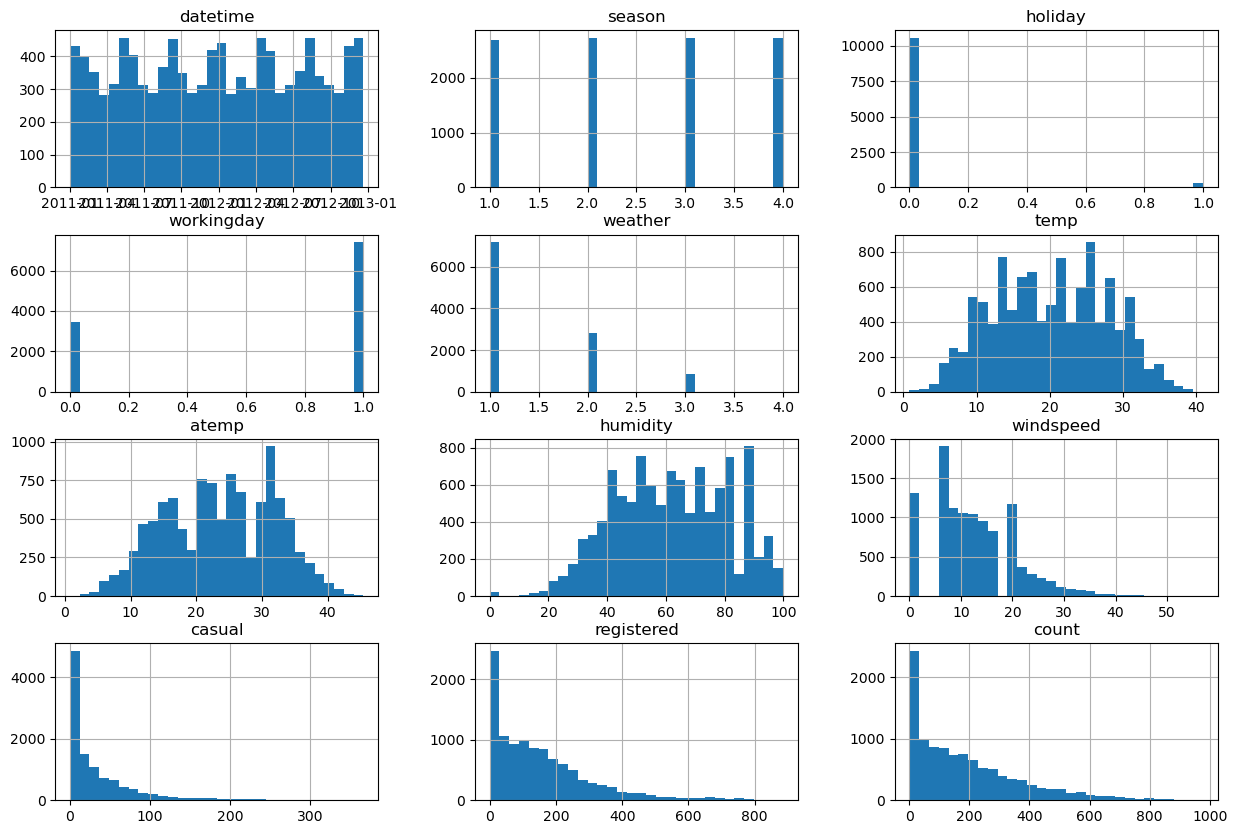

In [ ]:
train.hist(bins=30, figsize=(15, 10))

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [ ]:
# Feature eng
train["hours"] = train.datetime.dt.hour
test["hours"] = test.datetime.dt.hour

In [ ]:
# Convert features to category type
train["season"] = train["season"].astype('category')
train["weather"] = train["weather"].astype('category')
test["season"] = test["season"].astype('category')
test["weather"] = test["weather"].astype('category')

In [ ]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hours
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


array([[<Axes: title={'center': 'datetime'}>,
        <Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'workingday'}>],
       [<Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'humidity'}>],
       [<Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'casual'}>,
        <Axes: title={'center': 'registered'}>],
       [<Axes: title={'center': 'count'}>,
        <Axes: title={'center': 'hours'}>, <Axes: >]], dtype=object)

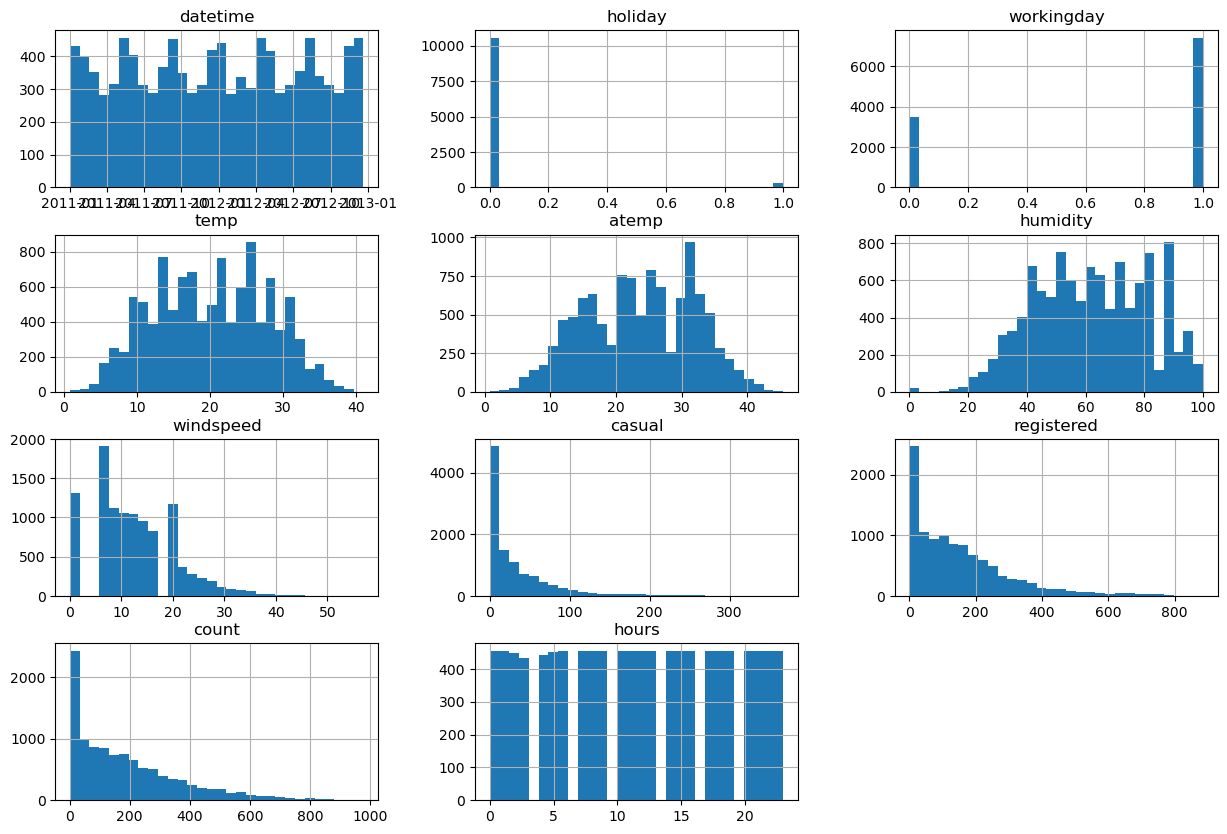

In [ ]:
train.hist(bins=30, figsize=(15, 10))

## Step 5: Rerun the model with the same settings as before, just with more features

In [ ]:
predictor_new_features = TabularPredictor(label="count",
                                          eval_metric="root_mean_squared_error",
                                          learner_kwargs={"ignored_columns": ["casual", "registered"]}
                                          ).fit(train_data=train,
                                                time_limit=600,
                                                presets="best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20250608_231023"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.0
Python Version:     3.12.9
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Tue May 6 04:10:50 UTC 2025
CPU Count:          2
Memory Avail:       0.95 GB / 3.76 GB (25.2%)
Disk Space Avail:   1.55 GB / 4.99 GB (31.0%)
	We recommend a minimum available disk space of 10 GB, and large datasets may require more.
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to ident

In [ ]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -30.346343  root_mean_squared_error      23.138428  417.639798                0.000792           0.066751            3       True         15
1          LightGBM_BAG_L2  -30.742692  root_mean_squared_error      21.038458  325.935479                0.621008          26.614149            2       True         11
2        LightGBMXT_BAG_L2  -31.069482  root_mean_squared_error      21.790419  328.815862                1.372969          29.494532            2       True         10
3     ExtraTreesMSE_BAG_L2  -31.860944  root_mean_squared_error      20.701522  304.470449                0.284072           5.149118            2       True         13
4   RandomForestMSE_BAG_L2  -31.925349  root_mean_squared_error      20.763693  318.773869   

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L2': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -69.12625216792682,
  'LightG

In [ ]:
predictions_new = predictor_new_features.predict(test)

In [ ]:
predictions_new = predictions_new.clip(lower=0)

In [ ]:
submission_new_features = pd.read_csv('sampleSubmission.csv', parse_dates=['datetime'])
submission_new_features["count"] = predictions_new
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [ ]:
print("\nNew Predictions :")
print(predictions_new.head())


New Predictions :
0    17.030598
1    10.172400
2     9.051249
3     8.319782
4     7.318767
Name: count, dtype: float32


In [ ]:
print("\nNew Predictions Summary:")
print(predictions_new.describe())


New Predictions Summary:
count    6493.000000
mean      159.587906
std       141.088272
min         2.239445
25%        49.608551
50%       121.294746
75%       227.870865
max       817.038452
Name: count, dtype: float64


In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 700kB/s]
Successfully submitted to Bike Sharing Demand

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                        description                        status                     publicScore  privateScore  
---------------------------  --------------------------  ---------------------------------  -------------------------  -----------  ------------  
submission_new_features.csv  2025-06-08 23:27:59.163000  new features                       SubmissionStatus.COMPLETE  0.64353      0.64353       
submission.csv               2025-06-08 23:09:48.613000  bike-sharing-demand                SubmissionStatus.COMPLETE  1.80094      1.80094       
submission_new_hpo.csv       2025-06-07 23:27:08.937000  new features with hyperparameters  SubmissionStatus.ERROR                                
submission_new_features.csv  2025-06-07 18:58:58.727000  new features                       SubmissionStatus.ERROR                                


#### New Score of `0.64353`

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [ ]:
predictor_new_hpo = TabularPredictor(
    label="count",
    eval_metric="root_mean_squared_error",
    learner_kwargs={"ignored_columns": ["casual", "registered"]}
).fit(
    train_data=train,
    time_limit=600,
    presets="best_quality",
    num_stack_levels=3,
    num_bag_folds=5,
    num_bag_sets=3,
    dynamic_stacking=False,
    hyperparameter_tune_kwargs={
        'num_trials': 5,
        'scheduler': 'local',
        'searcher': 'random',
        'search_strategy': 'auto',
        'max_concurrent_trials': 2
    }
)

2025-06-09 00:20:54,472	INFO timeout.py:54 -- Reached timeout of 1.6659523042072852 seconds. Stopping all trials.
2025-06-09 00:20:54,491	INFO tune.py:1009 -- Wrote the latest version of all result files and experiment state to '/home/sagemaker-user/nd009t-c1-intro-to-ml-project-starter/AutogluonModels/ag-20250609_001558/models/NeuralNetTorch_r22_BAG_L1' in 0.0084s.
I0000 00:00:1749428454.687886   22174 chttp2_transport.cc:1182] ipv4:169.255.255.2:37105: Got goaway [2] err=UNAVAILABLE:GOAWAY received; Error code: 2; Debug Text: Cancelling all calls {created_time:"2025-06-09T00:20:54.687882508+00:00", http2_error:2, grpc_status:14}
2025-06-09 00:20:56,435	WARNING experiment_analysis.py:180 -- Failed to fetch metrics for 5 trial(s):
- 9a477_00000: FileNotFoundError('Could not fetch metrics for 9a477_00000: both result.json and progress.csv were not found at /home/sagemaker-user/nd009t-c1-intro-to-ml-project-starter/AutogluonModels/ag-20250609_001558/models/NeuralNetTorch_r22_BAG_L1/9a477

In [ ]:
predictor_new_hpo.fit_summary()

The history saving thread hit an unexpected error (OperationalError('unable to open database file')).History will not be written to the database.
*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val              eval_metric  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0    KNeighborsDist_BAG_L1  -84.125061  root_mean_squared_error       0.044771   0.092700                0.044771           0.092700            1       True          2
1    KNeighborsUnif_BAG_L1 -101.546199  root_mean_squared_error       0.045587   0.096275                0.045587           0.096275            1       True          1
2   RandomForestMSE_BAG_L1 -116.548359  root_mean_squared_error       0.654801  16.171609                0.654801          16.171609            1       True          5
3    ExtraTrees_r42_BAG_L1 -123.639256  root_mean_squared_error       0.652310   7.384040                0.652310       

OSError: [Errno 28] No space left on device: '/home/sagemaker-user/nd009t-c1-intro-to-ml-project-starter/AutogluonModels/ag-20250609_001558/SummaryOfModels.html'

^ OSError is about disk space and can be ignored.

In [ ]:
print(predictor_new_hpo.leaderboard())

                     model   score_val              eval_metric  \
0    KNeighborsDist_BAG_L1  -84.125061  root_mean_squared_error   
1    KNeighborsUnif_BAG_L1 -101.546199  root_mean_squared_error   
2   RandomForestMSE_BAG_L1 -116.548359  root_mean_squared_error   
3    ExtraTrees_r42_BAG_L1 -123.639256  root_mean_squared_error   
4     ExtraTreesMSE_BAG_L1 -128.905192  root_mean_squared_error   
5        XGBoost_BAG_L1/T1 -174.601624  root_mean_squared_error   
6       LightGBM_BAG_L1/T1 -175.831695  root_mean_squared_error   
7     LightGBMLarge_BAG_L1 -177.465739  root_mean_squared_error   
8     LightGBMXT_BAG_L1/T1 -178.025613  root_mean_squared_error   
9     LightGBM_r131_BAG_L1 -179.102531  root_mean_squared_error   
10     LightGBM_r96_BAG_L1 -179.463324  root_mean_squared_error   
11      XGBoost_r33_BAG_L1 -179.875253  root_mean_squared_error   

    pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  \
0        0.044771   0.092700                0.044771 

In [ ]:
predictions_hpo = predictor_new_hpo.predict(test)

In [ ]:
predictions_hpo = predictions_hpo.clip(lower=0)

In [ ]:
submission_new_hpo = pd.read_csv('sampleSubmission.csv', parse_dates=['datetime'])
submission_new_hpo["count"] = predictions_hpo
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 797kB/s]
Successfully submitted to Bike Sharing Demand

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                        description                        status                     publicScore  privateScore  
---------------------------  --------------------------  ---------------------------------  -------------------------  -----------  ------------  
submission_new_hpo.csv       2025-06-09 00:26:32.903000  new features with hyperparameters  SubmissionStatus.COMPLETE  1.84672      1.84672       
submission_new_features.csv  2025-06-08 23:27:59.163000  new features                       SubmissionStatus.COMPLETE  0.64353      0.64353       
submission.csv               2025-06-08 23:09:48.613000  bike-sharing-demand                SubmissionStatus.COMPLETE  1.80094      1.80094       
submission_new_hpo.csv       2025-06-07 23:27:08.937000  new features with hyperparameters  SubmissionStatus.ERROR                                


#### New Score of `1.84672`

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

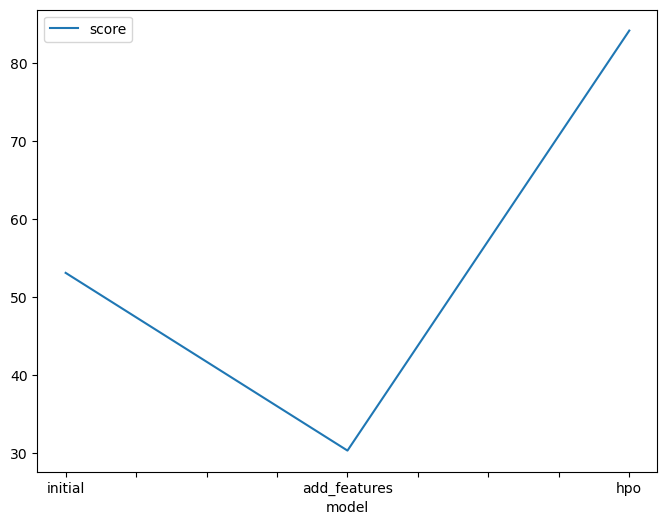

In [ ]:
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [53.102056, 30.346343, 84.125061]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

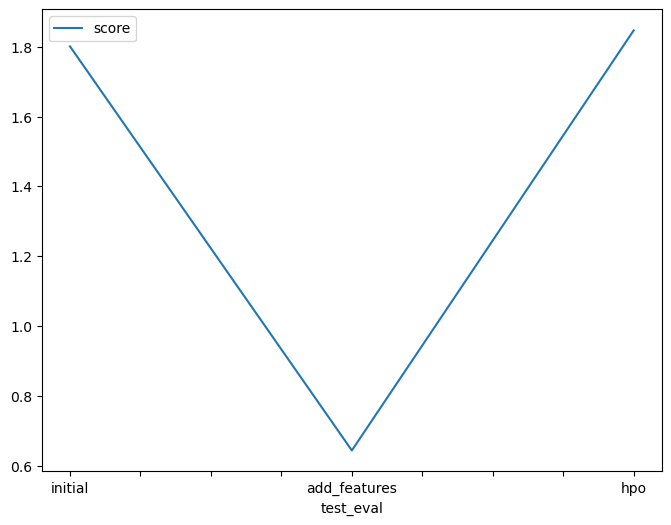

In [ ]:
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.80094, 0.64353, 1.84672]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [ ]:
results_df = pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "num_stack_levels": ["default", "default", "3"],
    "num_bag_folds": ["default", "default", "5"],
    "num_bag_sets": ["default", "default", "3"],
    "num_trials": ["default", "default", "5"],
    "searcher": ["default", "default", "random"],
    "max_concurrent_trials": ["default", "default", "2"],
    "score": [1.80094, 0.64353, 1.84672]
})

print(results_df)

          model num_stack_levels num_bag_folds num_bag_sets num_trials  \
0       initial          default       default      default    default   
1  add_features          default       default      default    default   
2           hpo                3             5            3          5   

  searcher max_concurrent_trials    score  
0  default               default  1.80094  
1  default               default  0.64353  
2   random                     2  1.84672  
